In [1]:
import pandas as pd,numpy as np

In [2]:
df=pd.read_csv('HeartDisease.csv')
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(302, 14)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
gender,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
chest_pain,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
rest_bps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
cholestrol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fasting_blood_sugar,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
rest_ecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exer_angina,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
old_peak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [17]:
import matplotlib.pyplot as plt,seaborn as sns

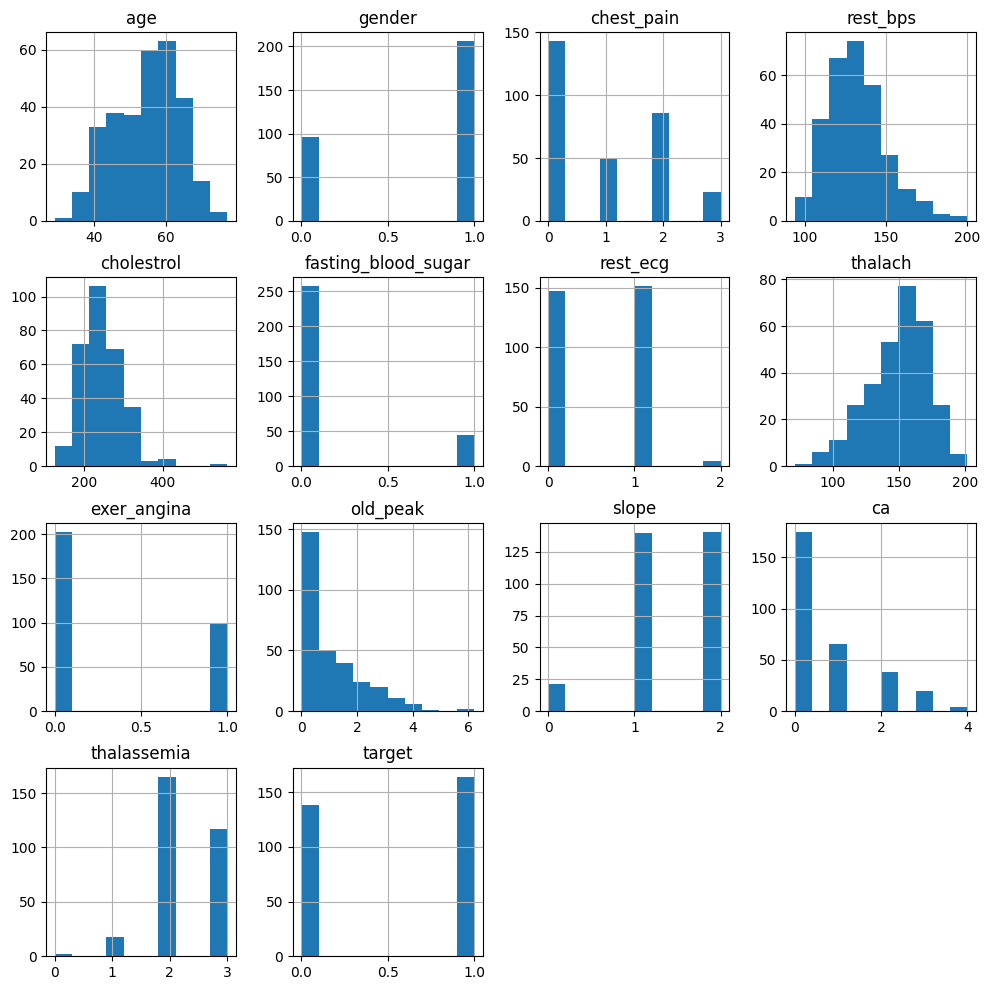

In [61]:
df.hist(figsize=(12,12))
plt.show()

In [23]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

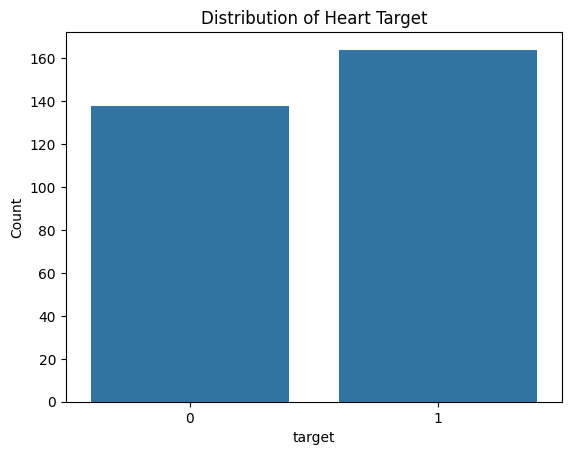

In [25]:
sns.barplot(x=df['target'].value_counts().index,y=df['target'].value_counts().values)
plt.ylabel('Count')
plt.title('Distribution of Heart Target')
plt.show()

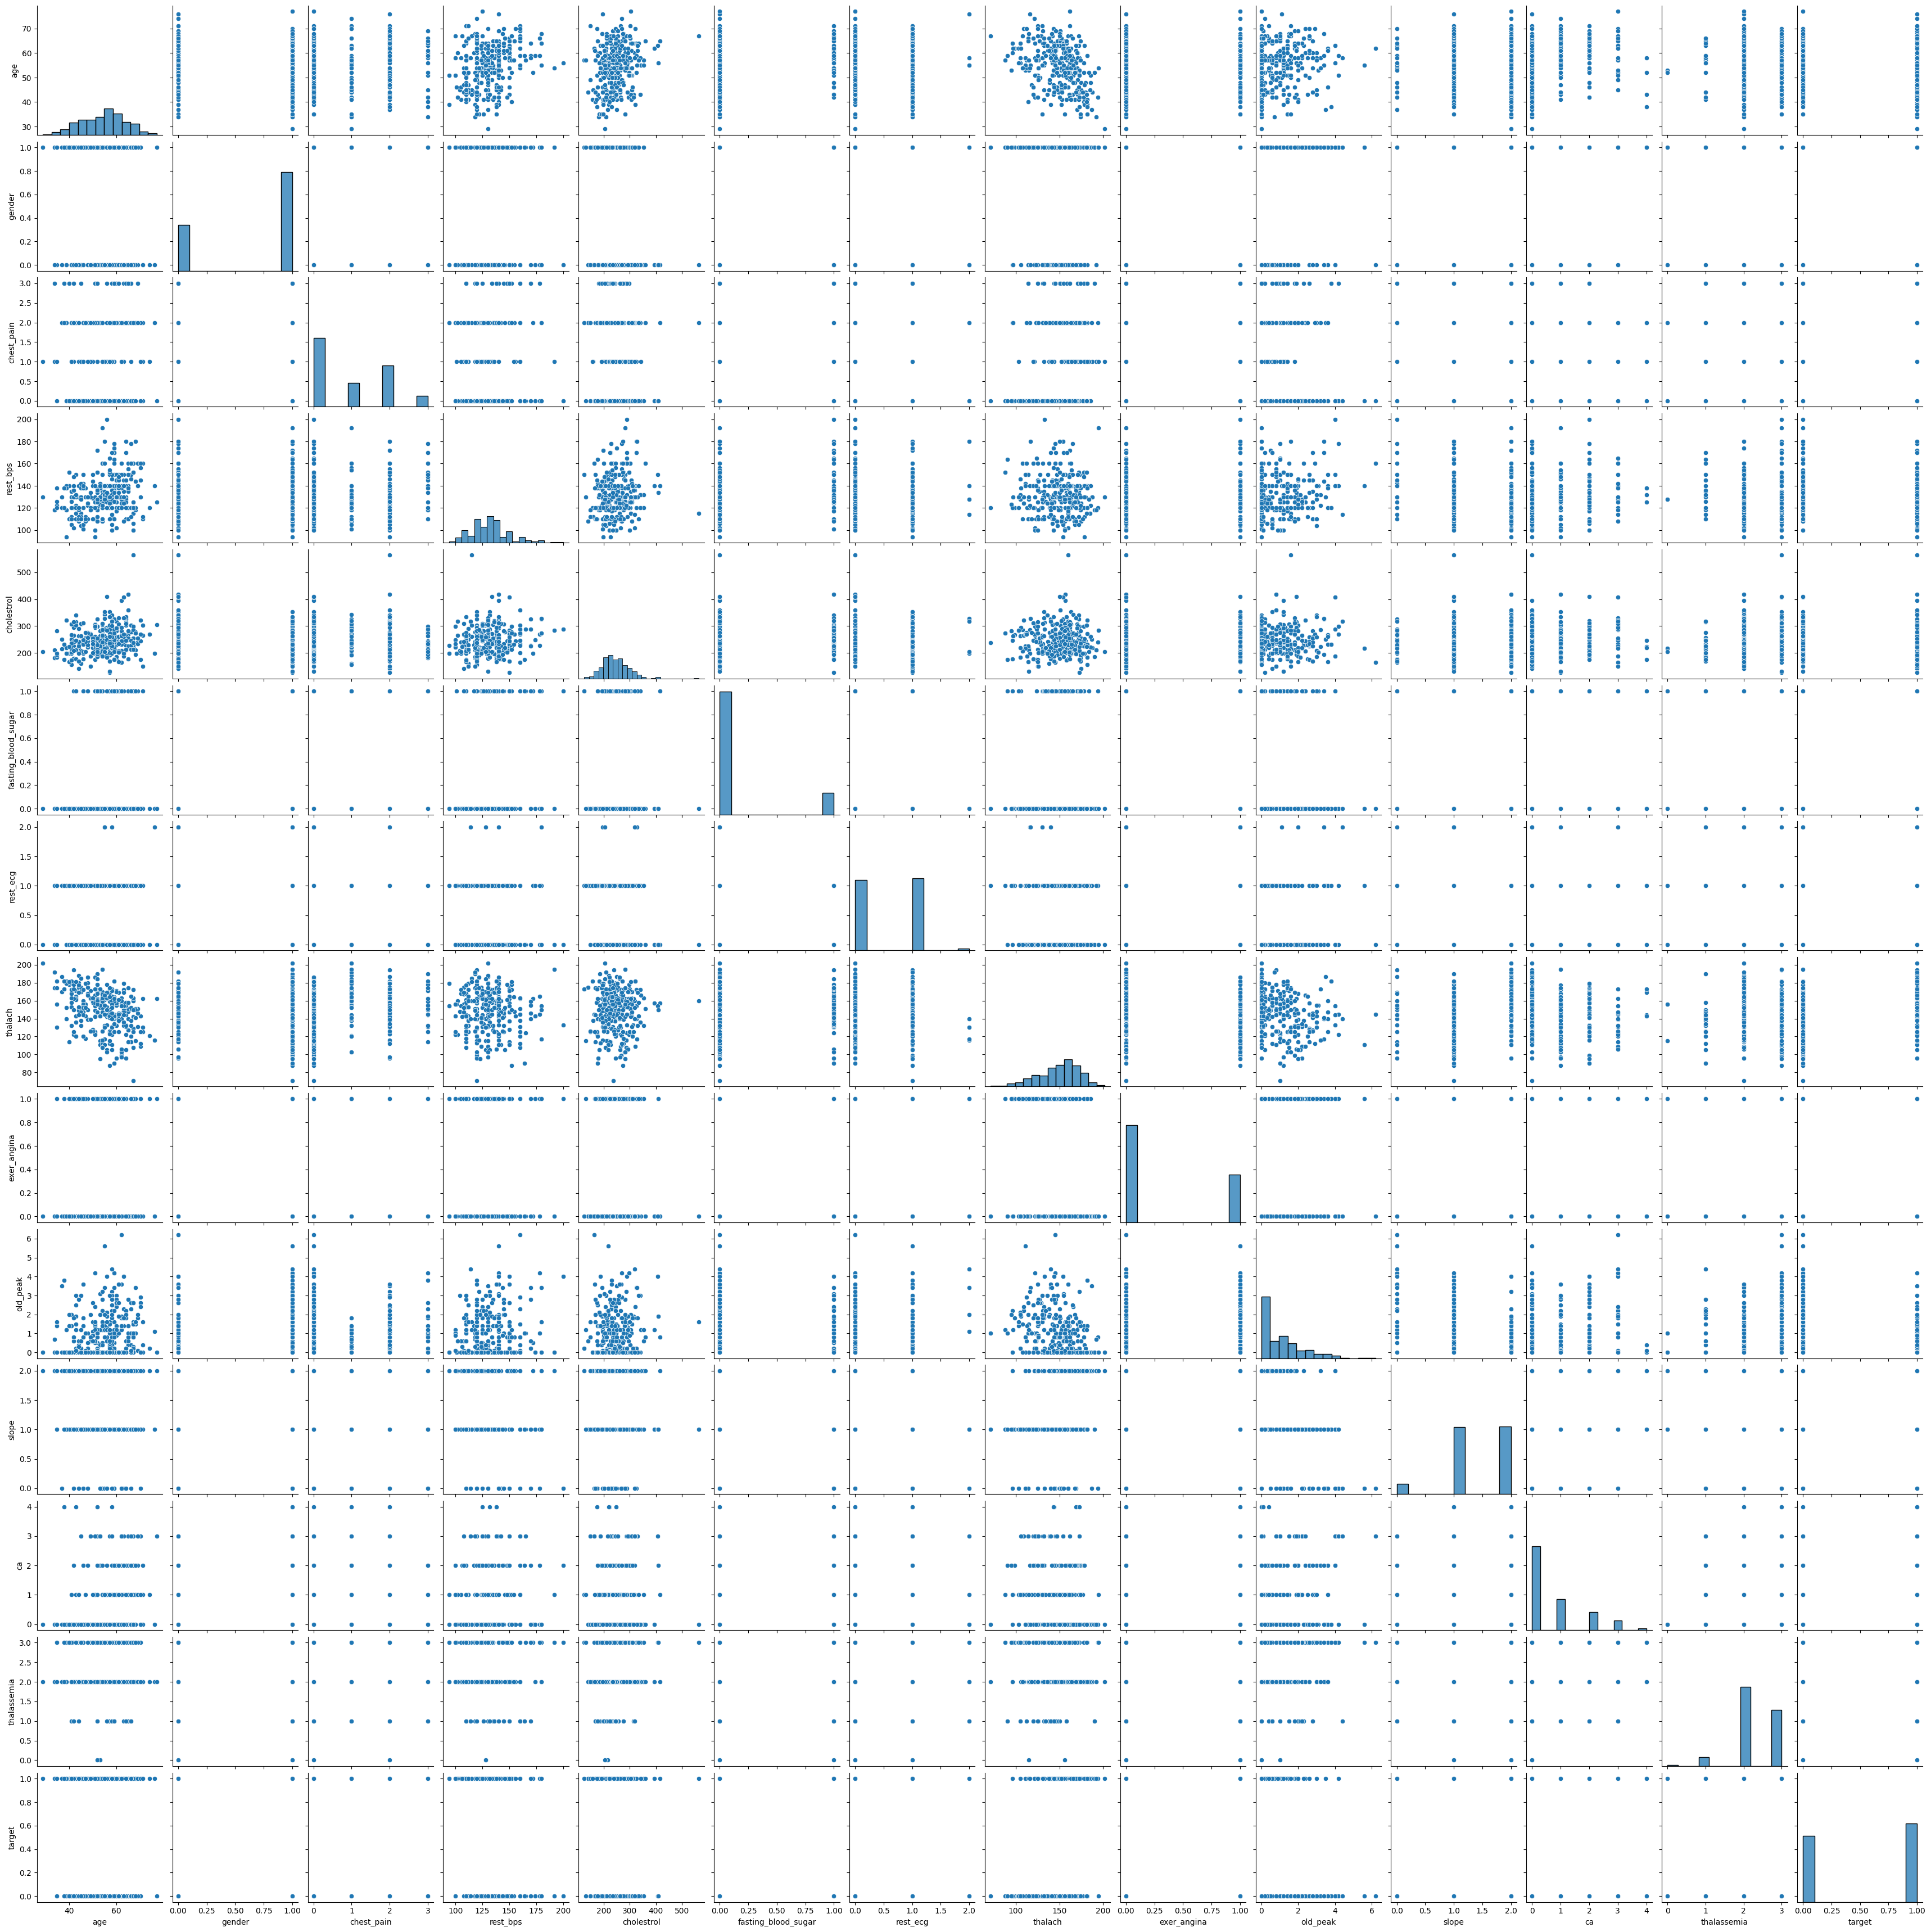

In [29]:
sns.pairplot(df)
plt.show()

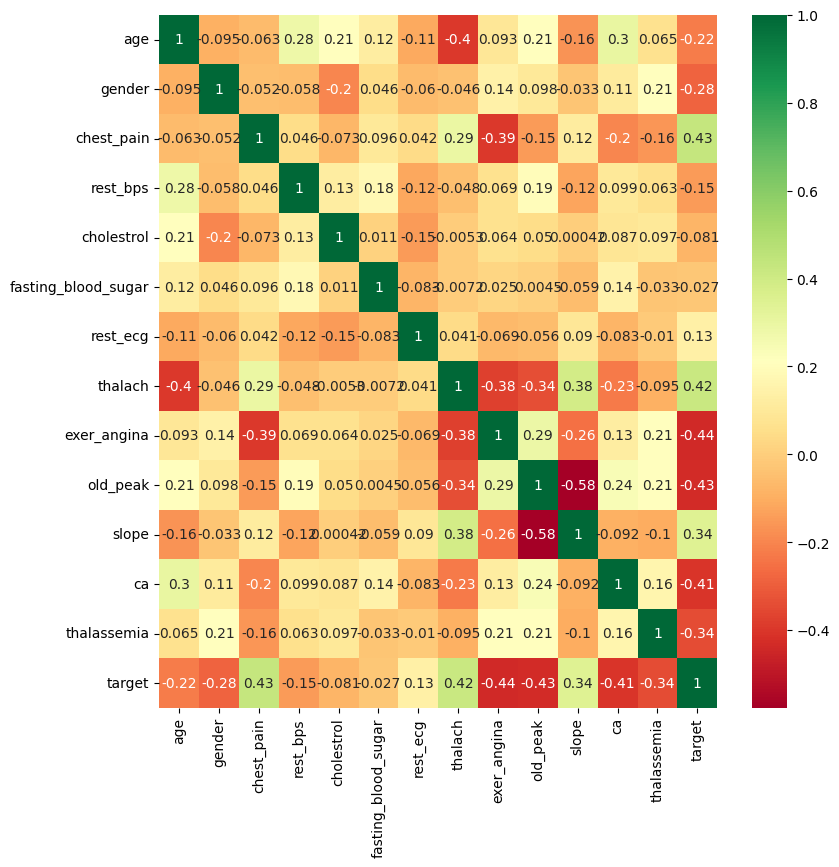

In [45]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 

In [49]:
x=df.drop('target',axis=1)
y=df['target']

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [53]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
yhat=lr.predict(x_test)
print(yhat[0:5])
print(y_test[0:5].values)

[0 0 1 0 1]
[0 0 1 0 1]


In [57]:
from sklearn.metrics import accuracy_score, classification_report

In [59]:
print('accuracy_score ',accuracy_score(y_test,yhat))
print(classification_report(y_test,yhat))

accuracy_score  0.8688524590163934
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

